# Mean field approximation

In [1]:
import networkx as nx
from matplotlib import rc
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
rc('font',**{'family':'serif','serif':['Computer Modern'],'size': 20})
rc('text', usetex=True)
import random as rn

## Mean-Field Approximation on Random Networks
state transition is summed up in the following table:

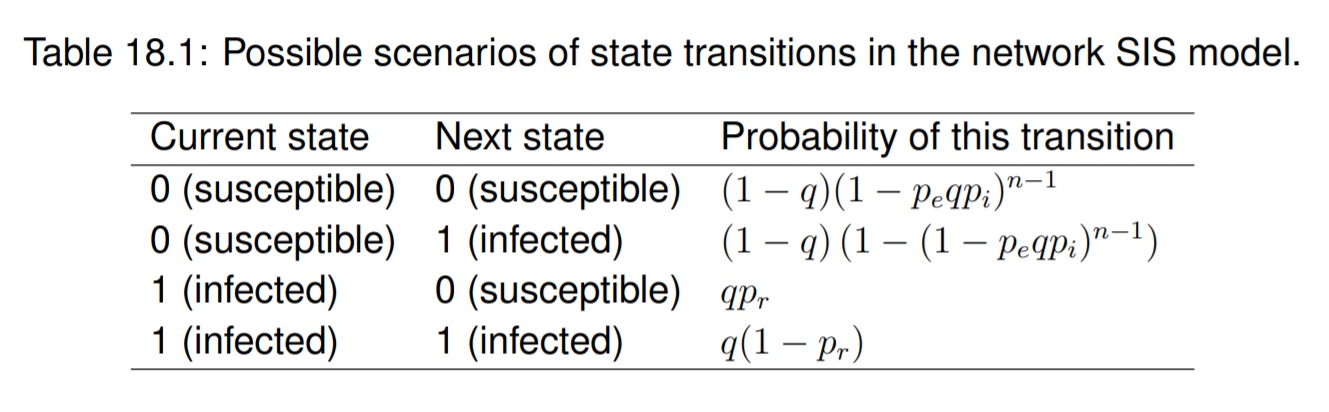

In [2]:
Image.open('Table 18.1.png')

The epidemic threshold is written in terms of the infection probability as:
$$p_i>\frac{p_r}{\left(n-1\right)p_e}=\frac{p_r}{{\langle{k}\rangle}}$$
as a condition for the disease to persist, where ${\langle{k}\rangle}$ is the average degree

**Sayama Exercise 18.5**

The required modification is to turn the asynchronous update function from 16.6 into a synchronous update function — so, rather than selecting nodes at random, make sure you loop through all nodes and neighbors in the graph.

In [3]:
# CODE 16.5
def initialize(n, p_e):
    global g, density_history
    density_history = []
    g = nx.erdos_renyi_graph(n, p_e)
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if rn.random() < 0.5 else 0

def observe():
    global g
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos, cmap='binary', edgecolors='black')

In [4]:
# CODE 16.6
#p_i = 0.5 # infection probability
#p_r = 0.5 # recovery probability
#p_e = 0.1 # connection probability

def update(p_i, p_r):
    global g
    #new_g = g.copy()
    for a in g.nodes:
        # if susceptible
        if g.nodes[a]['state'] == 0:
            for b in g.neighbors(a):
                # if neighbor b is infected
                if g.nodes[b]['state'] == 1:
                    g.nodes[a]['state'] = 1 if rn.random() < p_i else 0
        else: # if infected
            g.nodes[a]['state'] = 0 if rn.random() < p_r else 1
    #g = new_g.copy()
    density_history.append(sum(g.nodes[i]['state'] for i in g.nodes) / len(g.nodes))

C:\Users\Taha\Anaconda3\Anaconda4\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


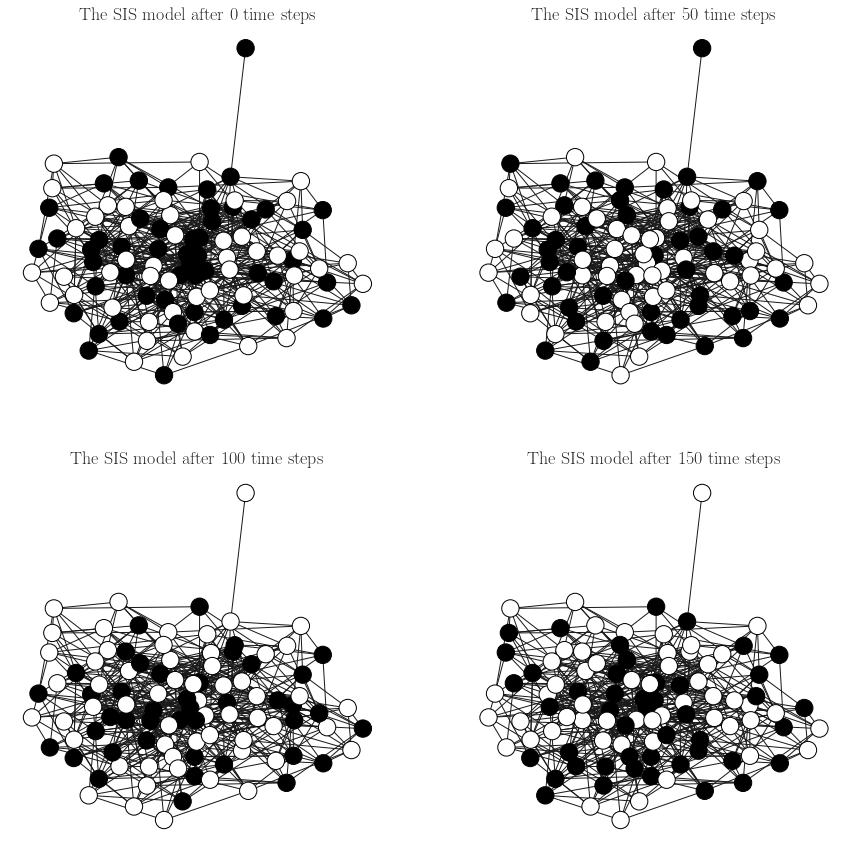

In [5]:
# n = 100, pe = 0.1, pi = 0.5, pr = 0.5 (pr < (n − 1)pe pi)

plt.figure(figsize=(15, 15))
initialize(100, 0.1)
for i in range(0, 151):
    update(p_i=0.5, p_r=0.5)
    if i%50 == 0:
        plt.subplot(2, 2, int(i//50)+1)
        plt.title("The SIS model after "+str(i)+" time steps",
                  fontsize=18)
        observe()
plt.show()

C:\Users\Taha\Anaconda3\Anaconda4\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


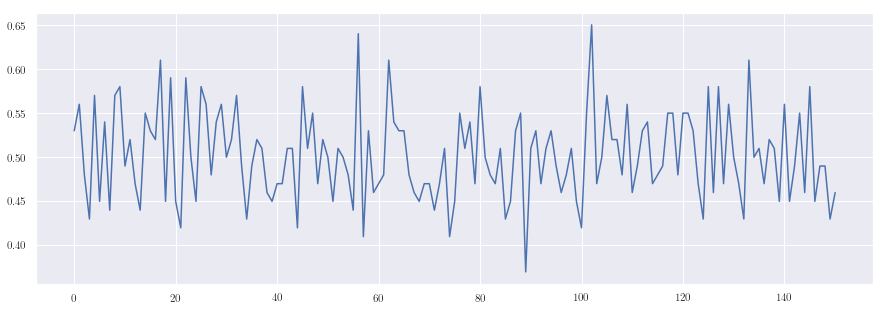

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(density_history)
plt.show()

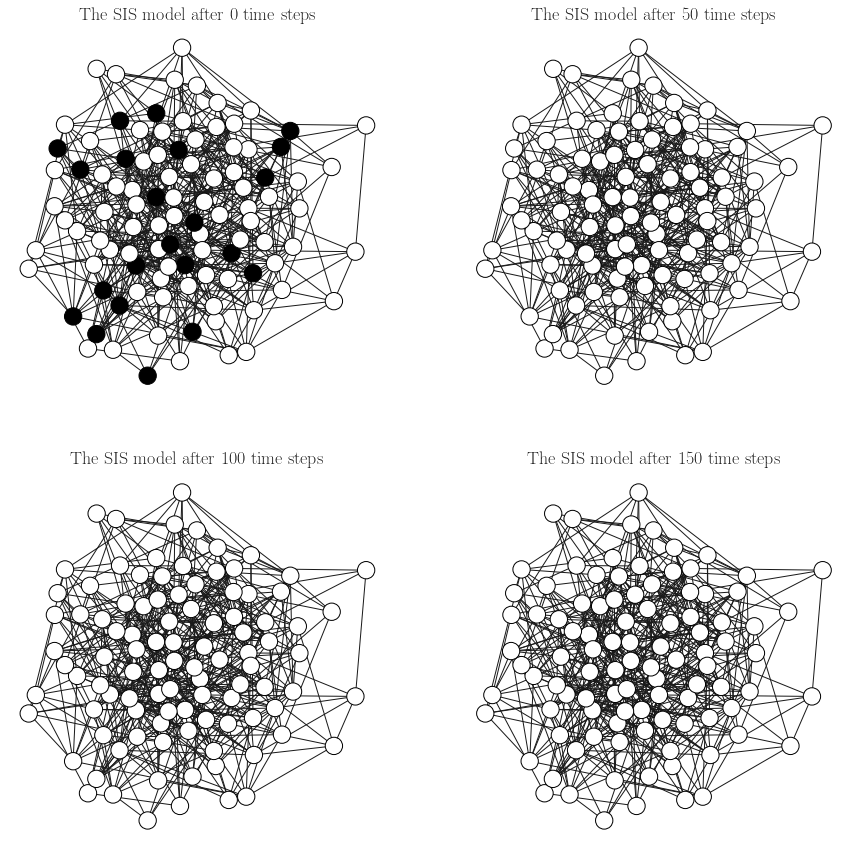

In [7]:
# n = 100, pe = 0.1, pi = 0.04, pr = 0.5 (pr > (n − 1)pepi)
        
plt.figure(figsize=(15, 15))
initialize(100, 0.1)
for i in range(0, 151):
    update(p_i=0.04, p_r=0.5)
    if i%50 == 0:
        plt.subplot(2, 2, int(i//50)+1)
        plt.title("The SIS model after "+str(i)+" time steps",
                  fontsize=18)
        observe()
plt.show()

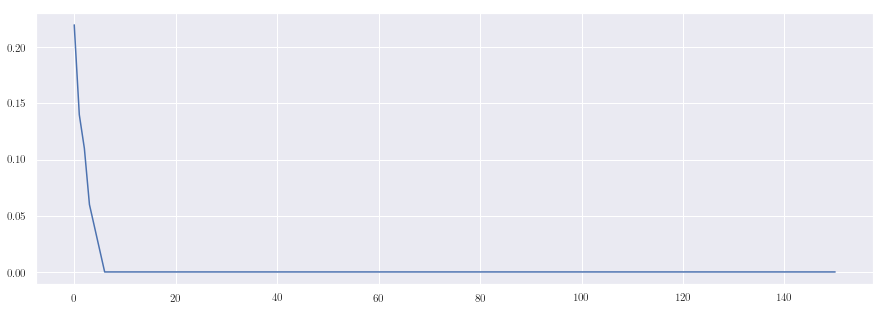

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(density_history)
plt.show()

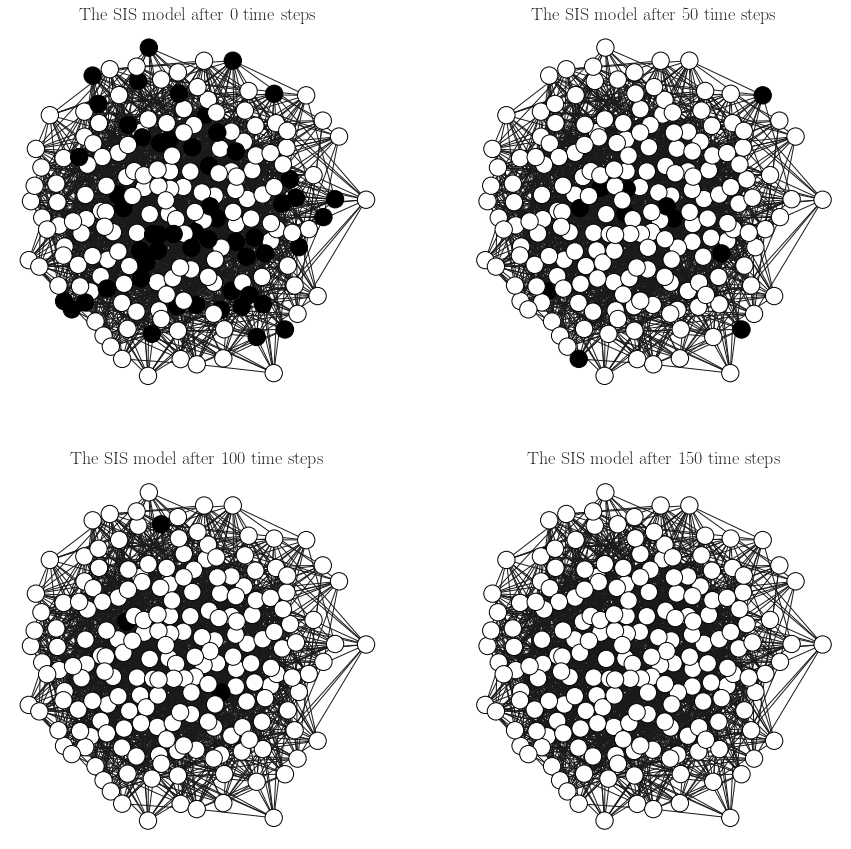

In [27]:
# n = 200, pe = 0.1, pi = 0.04, pr = 0.5 (pr < (n − 1)pepi)
        
plt.figure(figsize=(15, 15))
initialize(200, 0.1)
for i in range(0, 151):
    update(p_i=0.04, p_r=0.5)
    if i%50 == 0:
        plt.subplot(2, 2, int(i//50)+1)
        plt.title("The SIS model after "+str(i)+" time steps", 
                  fontsize=18)
        observe()
plt.show()

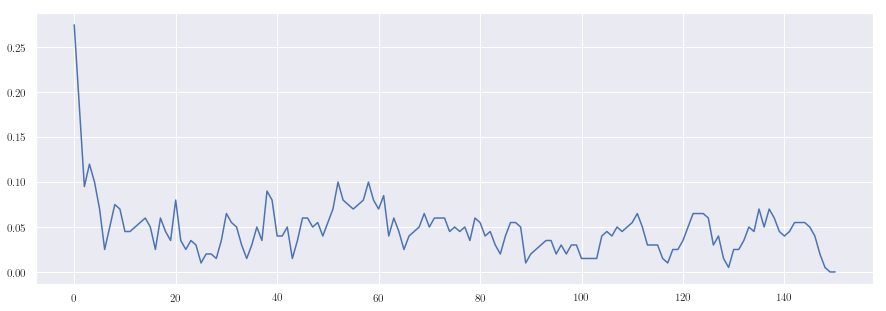

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(density_history)
plt.show()

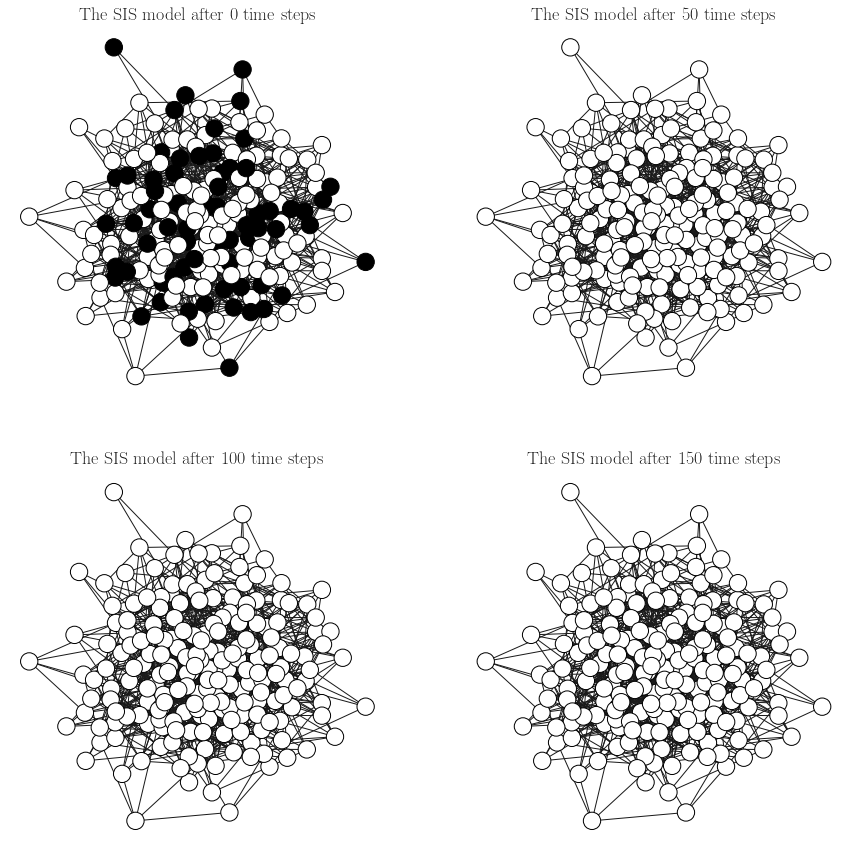

In [11]:
# n = 200, pe = 0.05, pi = 0.04, pr = 0.5 (pr > (n − 1)pepi)

plt.figure(figsize=(15, 15))
initialize(200, 0.05)
for i in range(0, 151):
    update(p_i=0.04, p_r=0.5)
    if i%50 == 0:
        plt.subplot(2, 2, int(i//50)+1)
        plt.title("The SIS model after "+str(i)+" time steps", 
                  fontsize=18)
        observe()
plt.show()

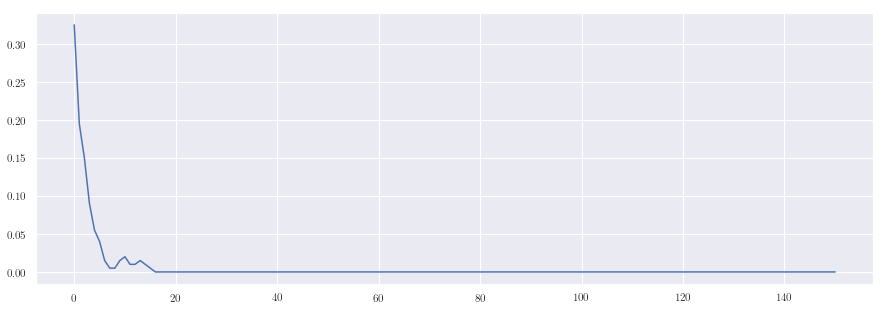

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(density_history)
plt.show()

**Discussion:** As mentioned in the plots above, the epidemic goes away quickly for the models where the values of p_r (the probability of recovery is higher than the product of p_i and p_e and (n-1)).
In the models where the threshold is not met, the desease is persistant in the network in the long term and doesn't die out completely. These results aligh with the mean field analysis predictons.


**Question:** Why does using synchronous or asynchronous updating make a difference?


The propagation of the desease is going to be slower is we picked synchronous updating method because at each time step we consider only one node whereas in reality, infection can happen multiple times from different infected nodes giving rise of the epidemic from different parts of the network.

**Question:** For the mean field approximation described in Section 18.5, why is it appropriate to use the synchronous update method and not the asynchronous one?


In the mean field analysis, we study the macroscopic state of the system as a whole rather than focusing only on one node. As a result, it is important to change the state of all the nodes at the same time step rather than updating on node at a time.

Experimentally confirm the "your friends have more friends than you do" observation from pp421–422 in the textbook.
- Generate a random network with 1000 nodes and (approximately) 20,000 edges, so that the average degree of a node is 40. Do this for each of the following types of random networks and compare your observations: 
    - Erdős-Renyi
    - Watts-Strogatz
    - Barabási-Albert random graphs.
- Write code to compute the average degree (which should be 40 — this is just to confirm that you generated the graph correctly).

In [29]:
er = nx.erdos_renyi_graph(1000, .04)
print(nx.info(er))

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 19825
Average degree:  39.6500


In [30]:
ws = nx.watts_strogatz_graph(1000, 40, .5)
print(nx.info(ws))

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 20000
Average degree:  40.0000


In [31]:
ba = nx.barabasi_albert_graph(1000, 20)
print(nx.info(ba))

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 19600
Average degree:  39.2000


- Write code to compute the average degree of each neighbor in the graph. To loop through all neighbors in the graph, loop through all edges and then through each node attached to an edge.

In [32]:
def avg_deg_neighbor(g):
    node, deg = 0, 0
    for edge in g.edges():
        for neighbor in edge:
            deg += len(g.edges(neighbor))
            node += 1
    return deg / node

print('Average degree of neighbors in:\n'
      '\nThe Erdős-Renyi', avg_deg_neighbor(er), 
      '\nWatts--Strogatz', avg_deg_neighbor(ws), 
      '\nBarabási-Albert', avg_deg_neighbor(ba))

Average degree of neighbors in:

The Erdős-Renyi 40.52277427490542 
Watts--Strogatz 40.3593 
Barabási-Albert 62.35918367346939


**Question:** How does the average degree of neighbors (the number of friends of your friends) compare to the average degree of the graph (your number of friends)?

In both Erdős-Renyi and Watts-Strogatz graphs, the average degree of neighbors is slightly greater than the average degree of the graph. However, the Barabási-Albert graph has about 50% higher average degree of neighbors than its average degree.
This is an example of the friendship paradox mentioned by Scott Feld.